## Apply SMOTE for upsampling the data

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

In [56]:
churnData = pd.read_csv('Customer-Churn.csv')
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [57]:
def get_started(data): 
      data.columns = [column.lower().replace(' ', '_').replace('#_','') for column in data.columns]
      print("shape dataframe: ", data.shape, data.info())

In [58]:
get_started(churnData)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   onlinesecurity    7043 non-null   object 
 7   onlinebackup      7043 non-null   object 
 8   deviceprotection  7043 non-null   object 
 9   techsupport       7043 non-null   object 
 10  streamingtv       7043 non-null   object 
 11  streamingmovies   7043 non-null   object 
 12  contract          7043 non-null   object 
 13  monthlycharges    7043 non-null   float64
 14  totalcharges      7043 non-null   object 
 15  churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [59]:
churnData.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [60]:
churnData['totalcharges'] = pd.to_numeric(churnData['totalcharges'], errors='coerce')

4.) Check for null values in the dataframe. Replace the null values.

In [61]:
def percantage_null(data):
    nulls = pd.DataFrame(data.isna().sum()*100/len(data), columns=['percentage'])
    print(nulls.sort_values('percentage', ascending = False))

In [62]:
percantage_null(churnData)

                  percentage
totalcharges        0.156183
gender              0.000000
seniorcitizen       0.000000
partner             0.000000
dependents          0.000000
tenure              0.000000
phoneservice        0.000000
onlinesecurity      0.000000
onlinebackup        0.000000
deviceprotection    0.000000
techsupport         0.000000
streamingtv         0.000000
streamingmovies     0.000000
contract            0.000000
monthlycharges      0.000000
churn               0.000000


In [63]:
def replace_by_mean(data, columns = []):
    for i in columns:
        data[i].fillna(data[i].mean(), inplace = True)

In [64]:
replace_by_mean(churnData, columns = ["totalcharges"])

In [65]:
percantage_null(churnData)

                  percentage
gender                   0.0
seniorcitizen            0.0
partner                  0.0
dependents               0.0
tenure                   0.0
phoneservice             0.0
onlinesecurity           0.0
onlinebackup             0.0
deviceprotection         0.0
techsupport              0.0
streamingtv              0.0
streamingmovies          0.0
contract                 0.0
monthlycharges           0.0
totalcharges             0.0
churn                    0.0


1) Use logistic regression to fit the model and compute the accuracy of the model.

Descided to use the same columns like in the lab before 

In [66]:
X = churnData[['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges']]
y = churnData['churn']

In [67]:
transformer = Normalizer() 
transformer.fit(X)
x_normalized = transformer.transform(X)
x_normalized.shape

(7043, 4)

In [68]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

No     5174
Yes    5174
Name: churn, dtype: int64

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=100)
model = LogisticRegression()
model.fit(X_train,y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))
score_sm_class = model.score(X_test, y_test)
print("accuracy score for smote + logistic regression:", score_sm_class)

              precision    recall  f1-score   support

          No       0.77      0.68      0.72      1052
         Yes       0.71      0.78      0.74      1018

    accuracy                           0.73      2070
   macro avg       0.74      0.73      0.73      2070
weighted avg       0.74      0.73      0.73      2070

accuracy score for smote + logistic regression: 0.7333333333333333


2) Use decision tree classifier to fit the model and compute the accuracy of the model.

In [70]:
import pandas as pd
from sklearn.datasets import load_iris
X_sm, y_sm = load_iris(return_X_y=True)
print(X.shape)
print(y.shape)

(7043, 4)
(7043,)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=100)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))
score_sm_dec = model.score(X_test, y_test)
print("accuracy score for smote + decision tree:", score_sm_dec)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

accuracy score for smote + decision tree: 0.9666666666666667


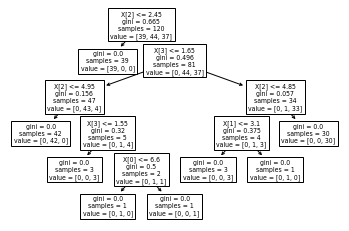

In [72]:
tree.plot_tree(model);

3) Compare the accuracies of the two models.

In [73]:
print("accuracy score for smote + logistic regression:", score_sm_class)
print("accuracy score for smote + decision tree:", score_sm_dec)

accuracy score for smote + logistic regression: 0.7333333333333333
accuracy score for smote + decision tree: 0.9666666666666667


## Apply TomekLinks for downsampling

In [74]:
X = churnData[['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges']]
y = churnData['churn']

In [75]:
transformer = Normalizer() 
transformer.fit(X)
x_normalized = transformer.transform(X)
x_normalized.shape

(7043, 4)

In [76]:
tomek = TomekLinks()
X_tl, y_tl = tomek.fit_resample(X, y)
y_tl.value_counts()

No     4620
Yes    1869
Name: churn, dtype: int64

4) Use logistic regression to fit the model and compute the accuracy of the model.

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=100)
model = LogisticRegression()
model.fit(X_train,y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))
score_tom_class = model.score(X_test, y_test)
print("accuracy score for tomek + logistic regression:", score_tom_class)

              precision    recall  f1-score   support

          No       0.83      0.90      0.86       891
         Yes       0.73      0.59      0.65       407

    accuracy                           0.80      1298
   macro avg       0.78      0.74      0.76      1298
weighted avg       0.80      0.80      0.80      1298

accuracy score for tomek + logistic regression: 0.802773497688752


5) Use decision tree classifier to fit the model and compute the accuracy of the model.

In [78]:
X_tl, y_tl = load_iris(return_X_y=True)
print(X.shape)
print(y.shape)

(7043, 4)
(7043,)


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=100)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))
score_tom_dec = model.score(X_test, y_test)
print("accuracy score for tomek + decision tree:", score_tom_dec)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

accuracy score for tomek + decision tree: 0.9666666666666667


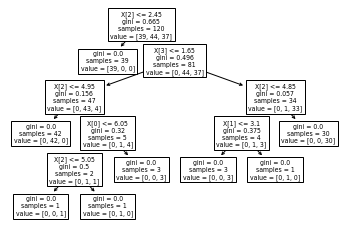

In [80]:
from sklearn import tree

tree.plot_tree(model);

6) Compare the accuracies of the two models.

In [81]:
print("accuracy score for tomek + logistic regression:", score_tom_class)
print("accuracy score for tomek + decision tree:", score_tom_dec)

accuracy score for tomek + logistic regression: 0.802773497688752
accuracy score for tomek + decision tree: 0.9666666666666667
